# Importer nødvendige funksjoner 

In [1]:
%matplotlib notebook
import geopandas as gpd
import mplleaflet

## Les bryggeridata

In [2]:
#funksjoner for å fikse opp dataene

#oversett alt annet enn punkt til punkt
def to_point(row):
    if row['geometry'].geom_type == 'Point':
        return row['geometry']
    return row['geometry'].centroid

#set operator-taggen
def fix_operator(row):
    if row['operator'] is None:
        return row['name']
    return row['operator']

In [3]:
# les inn bryggeriene fra en geojson-fil
bryggerier = gpd.read_file('./data/osm_breweries_norway_08032018.geojson')

#fiks opp kolonner
bryggerier['geometry'] = bryggerier.apply(to_point, axis=1)
bryggerier['operator'] = bryggerier.apply(fix_operator, axis=1)

# print( bryggerier.columns)

# velg ut de kolonnene vi faktisk bruker
bryggerier = bryggerier[['name', 'operator', 'amenity', 'geometry']]


In [4]:
bryggerier.describe()

,name,operator,amenity,geometry
count,138,138,38,138
unique,138,136,6,138
top,Haandbryggeriet,Ringnes Bryggeri,pub,POINT (9.549970999999999 59.1396178)
freq,1,2,17,1


In [5]:
bryggerier

,name,operator,amenity,geometry
0,Lervig Aktiebryggeri,Lervig Aktiebryggeri,None,POINT (5.746142767034293 58.94570846949821)
1,Ringnes Bryggeri,Ringnes Bryggeri,None,POINT (10.93189032774258 59.99209675567997)
2,Borg Bryggerier,Hansa Borg,None,POINT (11.11239512048502 59.29057490401918)
3,Haandbryggeriet,Haandbryggeriet,None,POINT (10.23138505977879 59.74216480250969)
4,E. C. Dahls Bryggeri,Ringnes Bryggeri,None,POINT (10.42700137022198 63.44091298857253)
5,Christianssand Brygghus,Christianssand Brygghus,pub,POINT (7.99393003340758 58.14454205074)
6,Christianssands Bryggeri,Hansa Borg,None,POINT (7.979171369885761 58.14782034059565)
7,Aass bryggeri,Aass bryggeri,None,POINT (10.21120833326642 59.7414731548904)
8,Little Brother Brewery,Little Brother Brewery,None,POINT (10.74483330963815 59.91937024420984)
9,Sagene Bryggeri,Sagene Bryggeri,None,POINT (10.7563746337984 59.93101542900136)


<IPython.core.display.Javascript object>


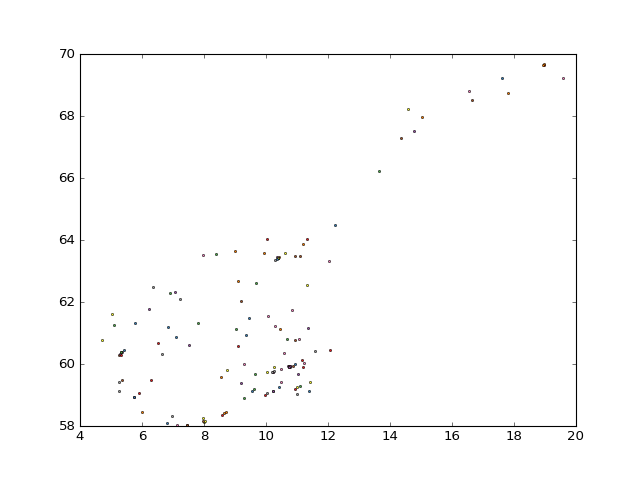

In [6]:
bryggerier.geometry.plot()